# California housing data set

## Libraries

In [1]:
import pandas as pd
import numpy as np

from sklearn.datasets import fetch_california_housing
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate

import matplotlib.pyplot as plt
%matplotlib inline

## Data

In [2]:
data = fetch_california_housing(as_frame=True)
df_raw = data.frame

In [3]:
print(data.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [4]:
df_raw.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


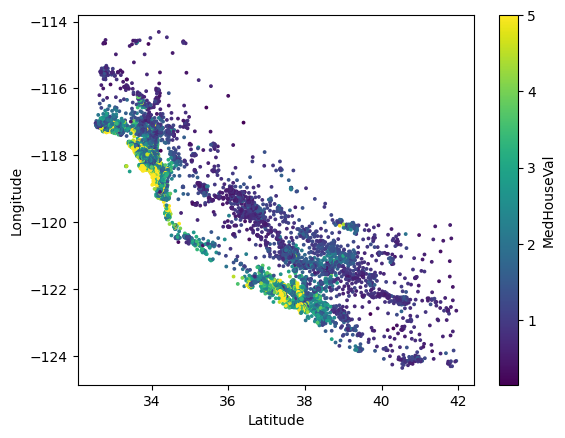

In [5]:
df_raw.plot(kind='scatter', x='Latitude', y='Longitude', s=3, c='MedHouseVal')
plt.show()

In [6]:
df_raw.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


## Data cleaning

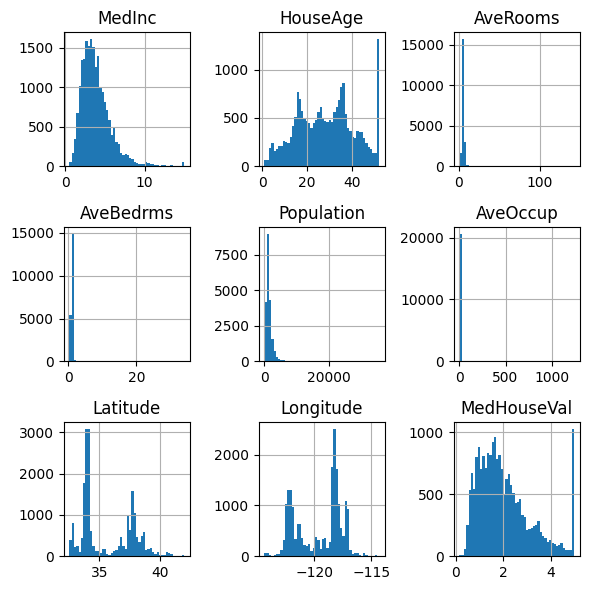

In [7]:
df_raw.hist(bins=50,  figsize=(6, 6))
plt.tight_layout()
plt.show()

In [8]:
df = df_raw.drop(df_raw[(df_raw.MedHouseVal >= 5) |
                        (df_raw.HouseAge>50) |
                        (df_raw.AveRooms > 20) |
                        (df_raw.AveOccup >= 10) |
                        (df_raw.Population >= 15000)].index)

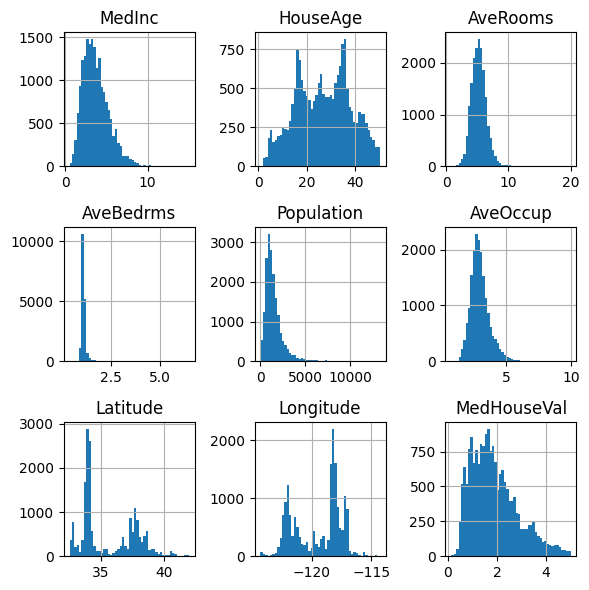

In [9]:
df.hist(bins=50,  figsize=(6, 6))
plt.tight_layout()
plt.show()

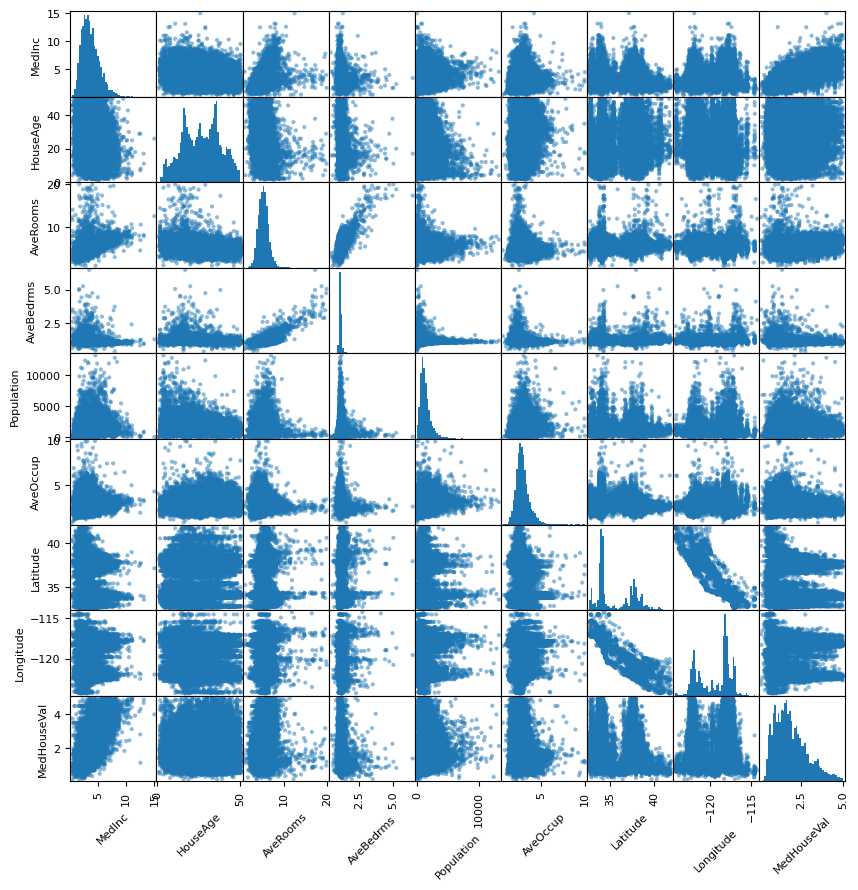

In [10]:
scatter_matrix = pd.plotting.scatter_matrix(df, hist_kwds={'bins':50}, figsize=(10, 10))
for ax in scatter_matrix.ravel():
    ax.set_xlabel(ax.get_xlabel(), fontsize = 8, rotation = 45)
    ax.set_ylabel(ax.get_ylabel(), fontsize = 8, rotation = 90)
plt.show()

In [11]:
data.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

## Models

### Linear Model

In [12]:
X = np.c_[df.MedInc, df.AveRooms, df.AveOccup, df.Population]
y = np.c_[df.MedHouseVal]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

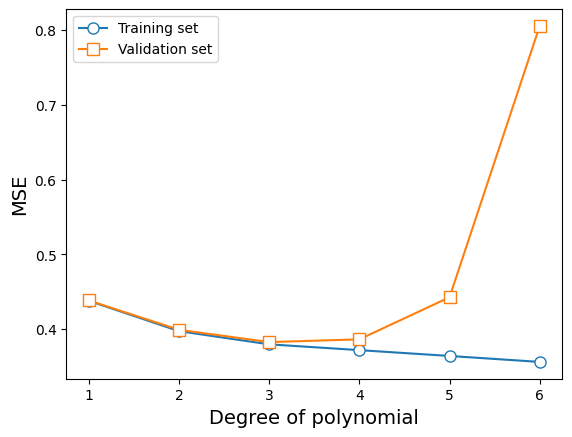

In [13]:
MSE_train = []
MSE_valid = []

n_max = 7
n_range = range(1, n_max)
for n in n_range:
    lin = make_pipeline(StandardScaler(),
                        PolynomialFeatures(n),
                        LinearRegression())
    lin.fit(X_train, y_train)
    scores = cross_validate(lin, X_train, y_train, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
    MSE_train = np.append(MSE_train, -scores['train_score'].mean())
    MSE_valid = np.append(MSE_valid, -scores['test_score'].mean())

plt.plot(n_range, MSE_train, "o-", markersize=8, markerfacecolor='white', label='Training set')
plt.plot(n_range, MSE_valid, "s-", markersize=8, markerfacecolor='white', label='Validation set')
plt.xlabel('Degree of polynomial', fontsize=14)
plt.ylabel('MSE', fontsize=14)
plt.legend(loc='best')
plt.show()

In [14]:
lin = make_pipeline(StandardScaler(),
                    PolynomialFeatures(3),
                    LinearRegression())
lin.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('linearregression', LinearRegression())])

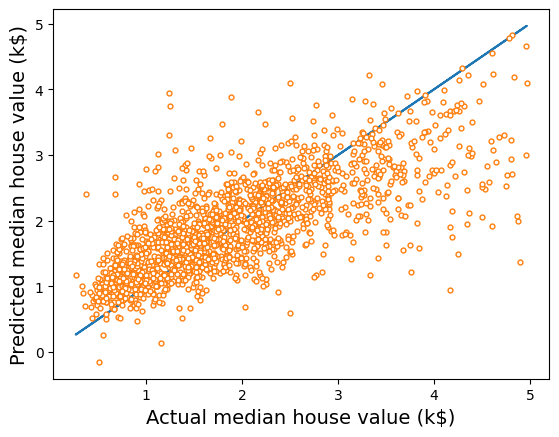

In [15]:
y_pred = lin.predict(X_test)
plt.plot(y_test, y_test, "-")
plt.plot(y_test, y_pred, ".", markersize=7, markerfacecolor='white')
plt.xlabel('Actual median house value (k$)', fontsize=14)
plt.ylabel('Predicted median house value (k$)', fontsize=14)
plt.show()

In [16]:
lin.score(X_test, y_test)

0.5656769630832343

### KNN Regression

In [17]:
X = np.c_[df.MedInc, df.AveRooms, df.AveOccup, df.Longitude, df.Latitude]
y = np.c_[df.MedHouseVal]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

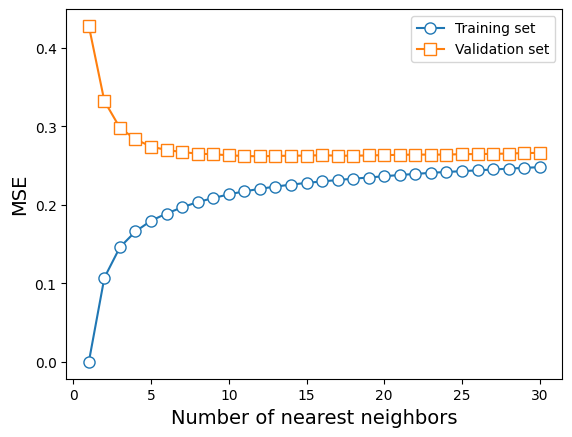

In [18]:
MSE_train = []
MSE_valid = []

n_max = 31
n_range = range(1, n_max, 1)
for n in n_range:
    knn = make_pipeline(StandardScaler(),
                        KNeighborsRegressor(n_neighbors=n))
    knn.fit(X_train, y_train)
    scores = cross_validate(knn, X_train, y_train, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
    MSE_train = np.append(MSE_train, -scores['train_score'].mean())
    MSE_valid = np.append(MSE_valid, -scores['test_score'].mean())

plt.plot(n_range, MSE_train, "o-", markersize=8, markerfacecolor='white', label='Training set')
plt.plot(n_range, MSE_valid, "s-", markersize=8, markerfacecolor='white', label='Validation set')
plt.xlabel('Number of nearest neighbors', fontsize=14)
plt.ylabel('MSE', fontsize=14)
plt.legend(loc='best')
plt.show()

In [19]:
knn = make_pipeline(StandardScaler(),
                    KNeighborsRegressor(n_neighbors=20))
knn.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsregressor', KNeighborsRegressor(n_neighbors=20))])

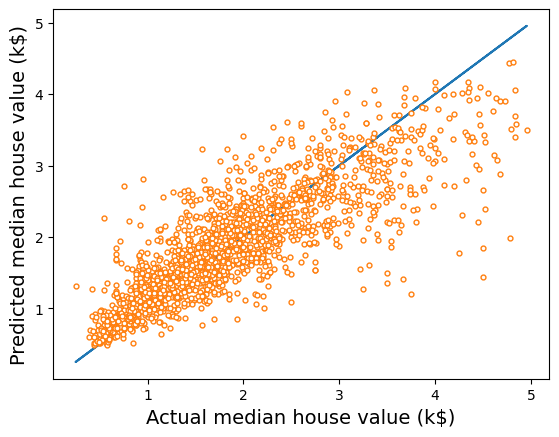

In [20]:
y_pred = knn.predict(X_test)
plt.plot(y_test, y_test, "-")
plt.plot(y_test, y_pred, ".", markersize=7, markerfacecolor='white')
plt.xlabel('Actual median house value (k$)', fontsize=14)
plt.ylabel('Predicted median house value (k$)', fontsize=14)
plt.show()

In [21]:
knn.score(X_test, y_test)

0.7014362549861844

In [22]:
knn.predict([X_test[450]])

array([[2.1603]])

In [23]:
y_test[450]

array([2.846])

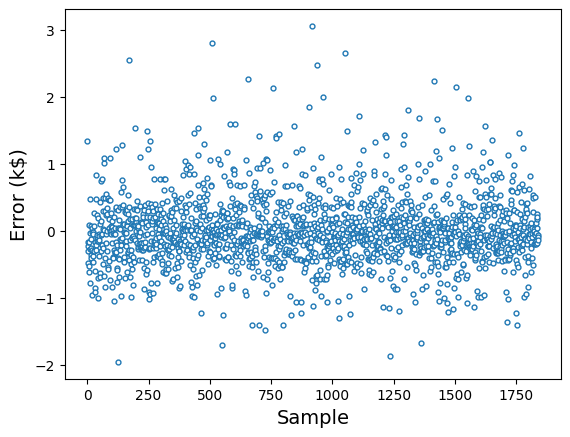

In [24]:
y_pred = knn.predict(X_test)
plt.plot(y_test-y_pred, ".", markersize=7, markerfacecolor='white')
plt.ylabel('Error (k$)', fontsize=14)
plt.xlabel('Sample', fontsize=14)
plt.show()